In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
from helpers import plot_sigma_kmax, plot_spectra_glam, plot_spectra, plot_ratios, plot_glambk

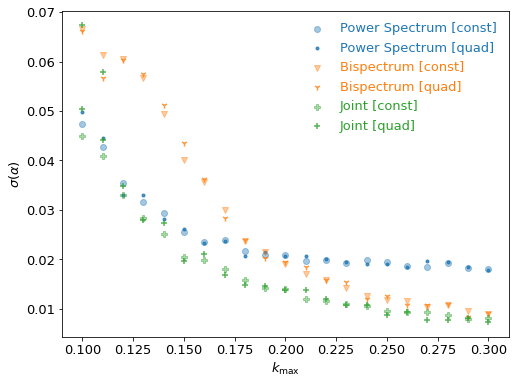

In [3]:
plot_sigma_kmax()

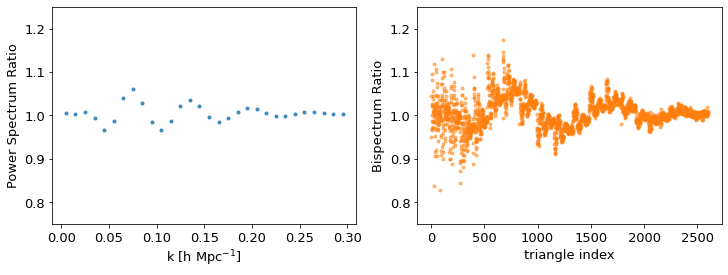

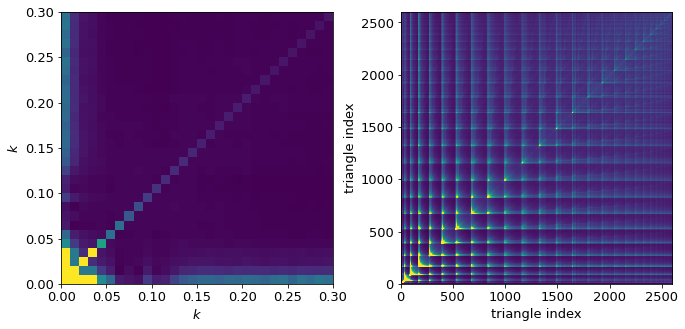

In [4]:
plot_spectra_glam()

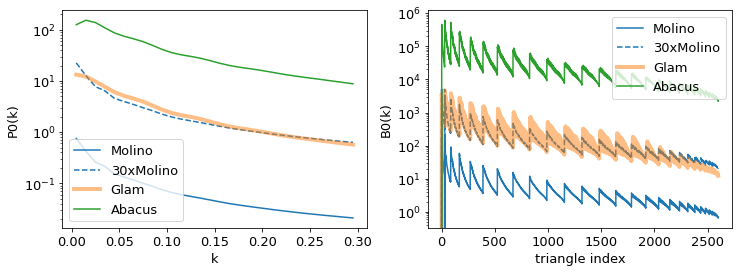

In [5]:
plot_spectra()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


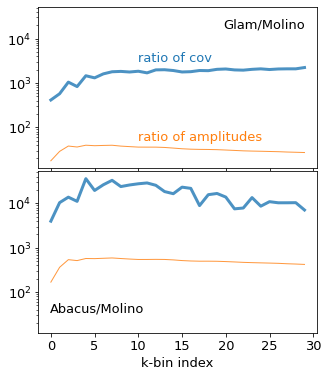

In [6]:
plot_ratios()

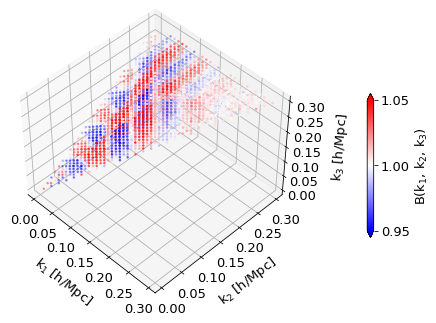

In [7]:
plot_glambk()

In [ ]:
# compare the ratio of covariance (diagonal) to the ratio of amplitudes
# Abacus variance is more sensitive to # of realizations rather than the amplitude

In [36]:
from scipy.stats import binned_statistic

In [89]:
d1 = np.load('mcmcs/mcmc_is_pk_kmax_0.25_quad_v1.1.npz')
d2 = np.load('mcmcs/mcmc_is_joint_kmax_0.25_quad_v1.1.npz')

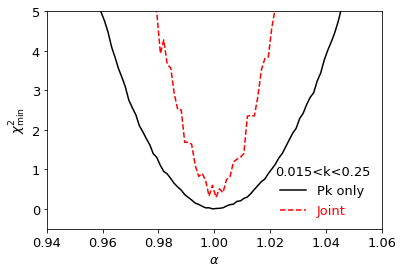

In [90]:
plt.axes(xlabel=r'$\alpha$', ylabel=r'$\chi^{2}_{\rm min}$',
        ylim=(-0.5, 5.), xlim=(0.94, 1.06))

alpha_edge = np.linspace(0.95, 1.05, num=81)

c = ['k', 'red']
ls = ['-', '--']
for i, (di, ni) in enumerate(zip([d1, d2],
                              ['Pk only', 'Joint'])):
    x = di['chain'][:, :, 0].flatten()
    y = -2.*di['log_prob'].flatten()
    
    ym = binned_statistic(x, y, statistic=np.min, bins=alpha_edge)[0]
    xm = binned_statistic(x, x, statistic=np.mean, bins=alpha_edge)[0]
    
    plt.plot(xm, ym, label=ni, ls=ls[i], color=c[i])
    
leg = plt.legend(frameon=False, title='0.015<k<0.25', loc=4)
for i, text in enumerate(leg.get_texts()):
    text.set_color(c[i])

/tmp/ipykernel_1288735/3931564000.py:15: RuntimeWarning: divide by zero encountered in log
  plt.plot(xm, -2.*np.log(ym), label=ni, ls=ls[i], color=c[i])


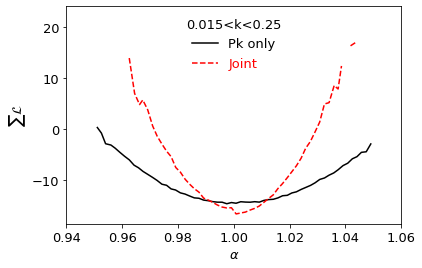

In [88]:
plt.axes(xlabel=r'$\alpha$', ylabel=r'$\sum \mathcal{L}$', xlim=(0.94, 1.06)) #        ylim=(-0.5, 5.)

alpha_edge = np.linspace(0.95, 1.05, num=61)

c = ['k', 'red']
ls = ['-', '--']
for i, (di, ni) in enumerate(zip([d1, d2],
                              ['Pk only', 'Joint'])):
    x = di['chain'][:, :, 0].flatten()
    y = np.exp(di['log_prob'].flatten())
    
    ym = binned_statistic(x, y, statistic=np.sum, bins=alpha_edge)[0]
    xm = binned_statistic(x, x, statistic=np.mean, bins=alpha_edge)[0]
    
    plt.plot(xm, -2.*np.log(ym), label=ni, ls=ls[i], color=c[i])
    
leg = plt.legend(frameon=False, title='0.015<k<0.25')
for i, text in enumerate(leg.get_texts()):
    text.set_color(c[i])

In [82]:
2

2

In [31]:
bks = glob('/home/lado/Molino/bk_molino.z0.0.fiducial.nbody*.hod0.hdf5')
len(bks)

15000

In [38]:
data = []
for fn in bks:
    
    d = np.loadtxt(fn)    
    k3d = d[:, :3]
    bk  = d[:, 3:]
    
    data.append(bk.flatten())

In [39]:
np.array(data).shape

(15000, 7800)

In [40]:
cov = np.cov(data, rowvar=False)

In [41]:
cov.shape

(7800, 7800)

In [42]:
std = np.diagonal(cov)**0.5

In [43]:
rcov = cov / np.outer(std, std)

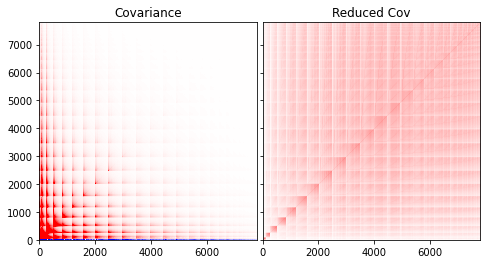

In [63]:
fg, ax = plt.subplots(ncols=2, figsize=(8, 4), sharey=True)
fg.subplots_adjust(wspace=0.0)

ax[0].imshow(cov, vmin=-0.2, vmax=0.2, origin='lower', cmap='bwr')
ax[1].imshow(rcov, vmin=-1.0, vmax=1.0, origin='lower', cmap='bwr')

for axi, ni in zip(ax, ['Covariance', 'Reduced Cov']):
    axi.set_title(ni)

Text(0.5, 0, 'Index')

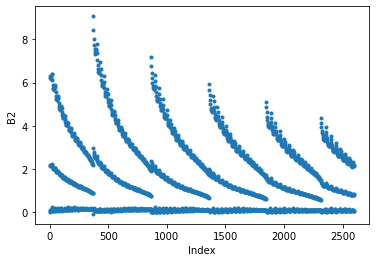

In [72]:
fg, ax = plt.subplots()

ax.scatter(np.arange(2600), np.mean(data, axis=0)[2600:2*2600], marker='.')
ax.set_ylabel('B2')
ax.set_xlabel('Index')

(-5.0, 100.0)

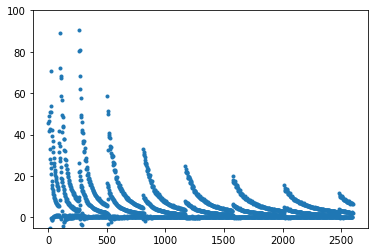

In [71]:
fg, ax = plt.subplots()

ax.scatter(np.arange(2600), np.mean(data, axis=0)[0:2600], marker='.')
ax.set_ylim(-5, 100)

In [52]:
np.percentile(rcov, [0, 100])

array([-0.95565027,  1.        ])

In [29]:
ls /home/lado/Molino/*.nbody0.hod0.hdf5

/home/lado/Molino/bk_molino.z0.0.fiducial.nbody0.hod0.hdf5
/home/lado/Molino/pk_molino.z0.0.fiducial.nbody0.hod0.hdf5


## MCMC

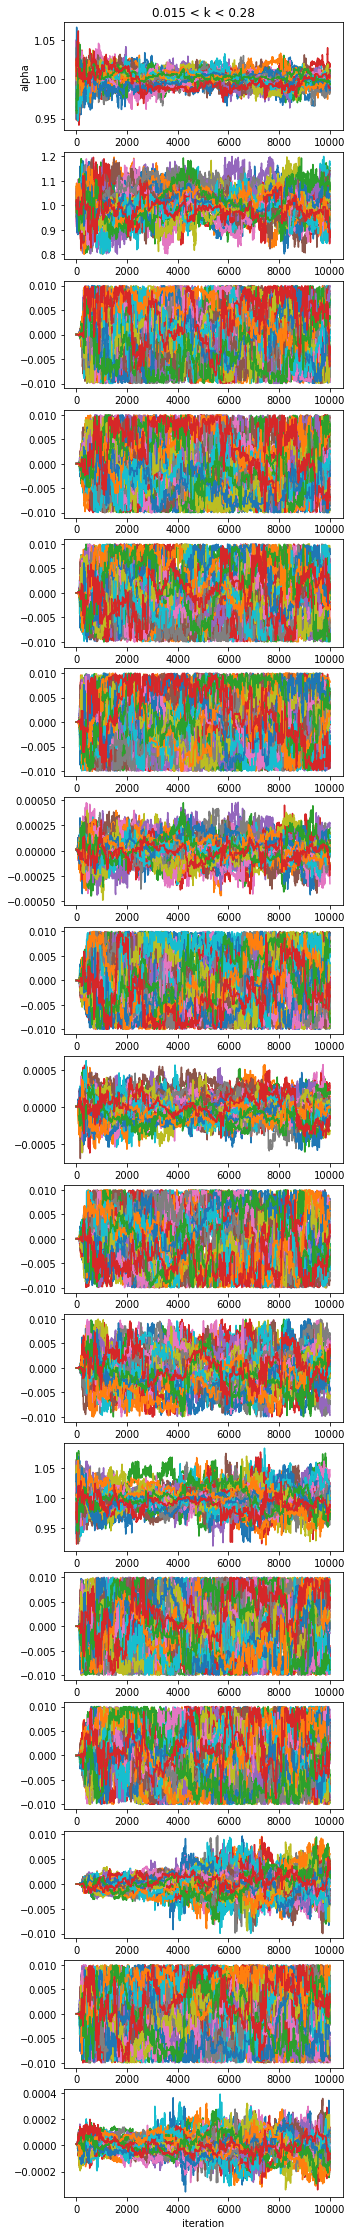

In [76]:
fg, ax = plt.subplots(nrows=17, figsize=(5, 40))
d_ = np.load('mcmcs/mcmc_is_joint_kmax_0.28_quad_v1.1.npz')
for i in range(17):
    ax[i].plot(d_['chain'][:, :, i])

ax[0].set_title('0.015 < k < 0.28')
ax[-1].set_xlabel('iteration')
ax[0].set_ylabel('alpha')
fg.savefig('traceplot_kmax_p28.png', dpi=300, bbox_inches='tight')

In [77]:
mcmcs_pk = glob('mcmcs/mcmc_is_bk_False_kmax_*')
mcmcs_bk = glob('mcmcs/mcmc_is_bk_True_kmax_*')
mcmcs_cs = glob('mcmcs/mcmc_is_joint_kmax_*_const.npz')
mcmcs_qd = glob('mcmcs/mcmc_is_joint_kmax_*_quad_v1.1.npz')

sigmas_pk = loop_files(mcmcs_pk)
sigmas_bk = loop_files(mcmcs_bk)
sigmas_cs = loop_files(mcmcs_cs)
sigmas_qd = loop_files(mcmcs_qd)

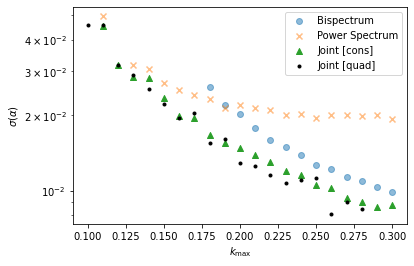

In [79]:
plt.scatter(*sigmas_bk, label='Bispectrum', alpha=0.5)
plt.scatter(*sigmas_pk, marker='x', label='Power Spectrum', alpha=0.5)
plt.scatter(*sigmas_cs, marker='^', label='Joint [cons]')
plt.scatter(*sigmas_qd, marker='.', color='k', label='Joint [quad]')
plt.legend()
# plt.ylim(0.01, 0.15)
plt.xlabel(r'$k_{\rm max}$')
plt.ylabel(r'$\sigma (\alpha)$')
plt.yscale('log')
# plt.yscale('symlog', linthresh=1.0e-1)
# plt.ylim(1.0e-4, 1.0)
plt.savefig('sigma_vs_kmax_quad_v1.1.png', dpi=300, bbox_inches='tight')

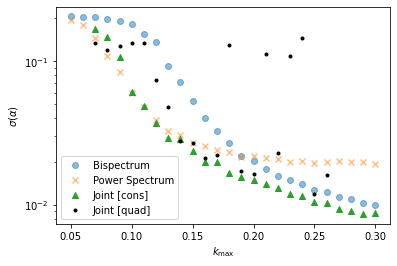

In [6]:
plt.scatter(*sigmas_bk, label='Bispectrum', alpha=0.5)
plt.scatter(*sigmas_pk, marker='x', label='Power Spectrum', alpha=0.5)
plt.scatter(*sigmas_cs, marker='^', label='Joint [cons]')
plt.scatter(*sigmas_qd, marker='.', color='k', label='Joint [quad]')
plt.legend()
# plt.ylim(0.01, 0.15)
plt.xlabel(r'$k_{\rm max}$')
plt.ylabel(r'$\sigma (\alpha)$')
plt.yscale('log')
# plt.yscale('symlog', linthresh=1.0e-1)
# plt.ylim(1.0e-4, 1.0)
# plt.savefig('sigma_vs_kmax.png', dpi=300, bbox_inches='tight')

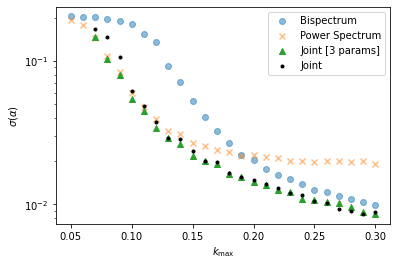

In [13]:
plt.scatter(*sigmas_bk, label='Bispectrum', alpha=0.5)
plt.scatter(*sigmas_pk, marker='x', label='Power Spectrum', alpha=0.5)
plt.scatter(*sigmas_cs, marker='^', label='Joint [cons]')
plt.scatter(*sigmas_qd, marker='.', color='k', label='Joint [quad]')
plt.legend()
# plt.ylim(0.01, 0.15)
plt.xlabel(r'$k_{\rm max}$')
plt.ylabel(r'$\sigma (\alpha)$')
plt.yscale('log')
# plt.yscale('symlog', linthresh=1.0e-1)
# plt.ylim(1.0e-4, 1.0)
# plt.savefig('sigma_vs_kmax.png', dpi=300, bbox_inches='tight')

In [80]:




def load(filename, label='Power Spectrum'):
    
    d_ = np.load(filename)
    nsteps, __, ndim = d_['chain'].shape
    
    good_cols = ((d_['chain'][nsteps//2:, :, 0] > 1.2) | (d_['chain'][nsteps//2:, :, 0] < 0.8)).sum(axis=0) == 0
    chains = d_['chain'][nsteps//2:, good_cols, :].reshape(-1, ndim)
    rhat = gelman_rubin(chains)
    print(rhat)
    
    prcnt = np.percentile(chains[:, 0], [16, 84])
    sigma = 0.5*(prcnt[1]-prcnt[0])
    print(sigma)
    

    names = ["x%s"%i for i in range(ndim)]
    labels =  [r"\alpha"] + ["A%d"%i for i in range(ndim-1)]
    samples = MCSamples(samples=chains, names=names, labels=labels, label=label,    
                       settings={'mult_bias_correction_order':0,
                                 'smooth_scale_2D':0.5, 'smooth_scale_1D':0.5})
    return samples

3.9627953506567577
0.012630104113839635
Removed no burn in
3.2580463000527646
0.010522199994981163
Removed no burn in
1.0418698114013631
0.01137356236571685
Removed no burn in


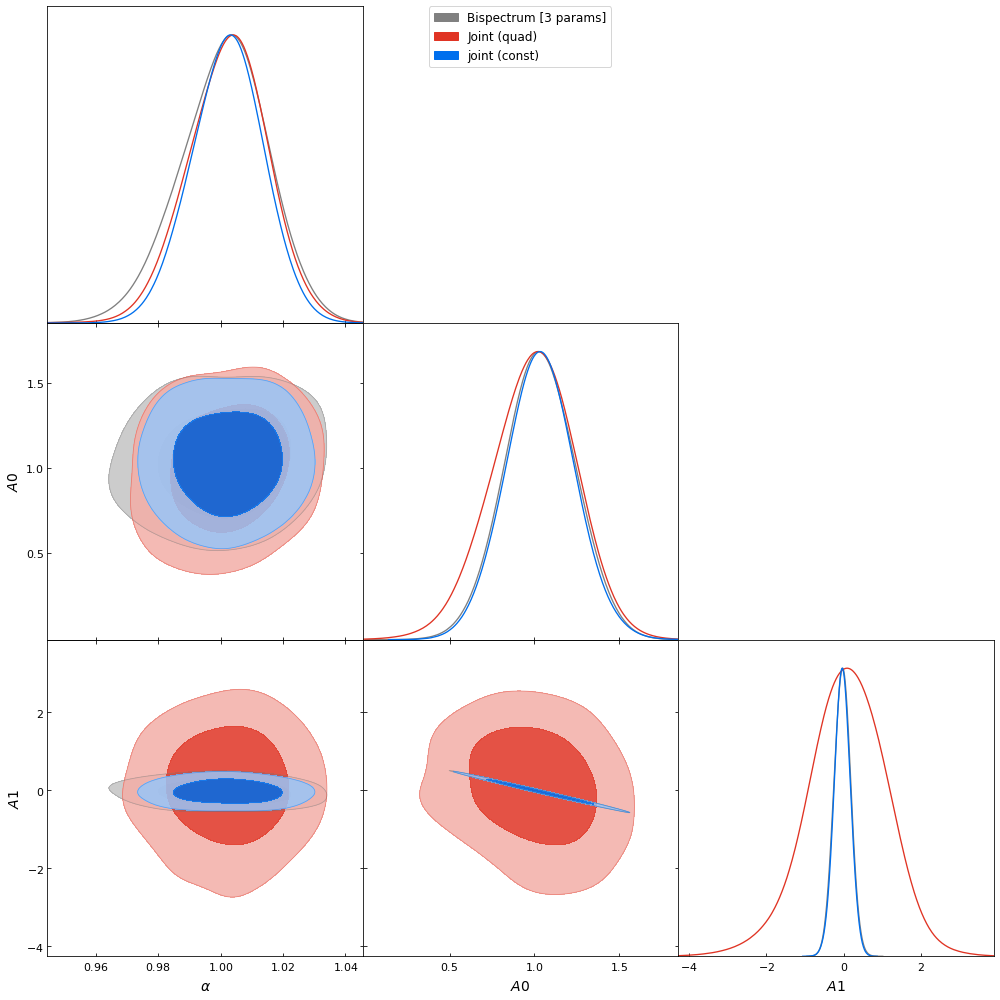

In [84]:
mcmc_bk = load('mcmcs/mcmc_is_bk_True_kmax_0.25.npz', 'Bispectrum [3 params]')
mcmc_pk = load('mcmcs/mcmc_is_joint_kmax_0.25_const.npz', 'joint (const)')
mcmc_jt = load('mcmcs/mcmc_is_joint_kmax_0.25_quad.npz', 'Joint (quad)')

# Triangle plot
g = plots.get_subplot_plotter(width_inch=14)
g.triangle_plot([mcmc_bk, mcmc_jt, mcmc_pk], filled=True, legend_loc='upper center')
# plt.savefig('mcmc_joint_kmax_0.30.png', dpi=300, bbox_inches='tight')

0.013907598505437213
Removed no burn in
0.020149574825118144
Removed no burn in


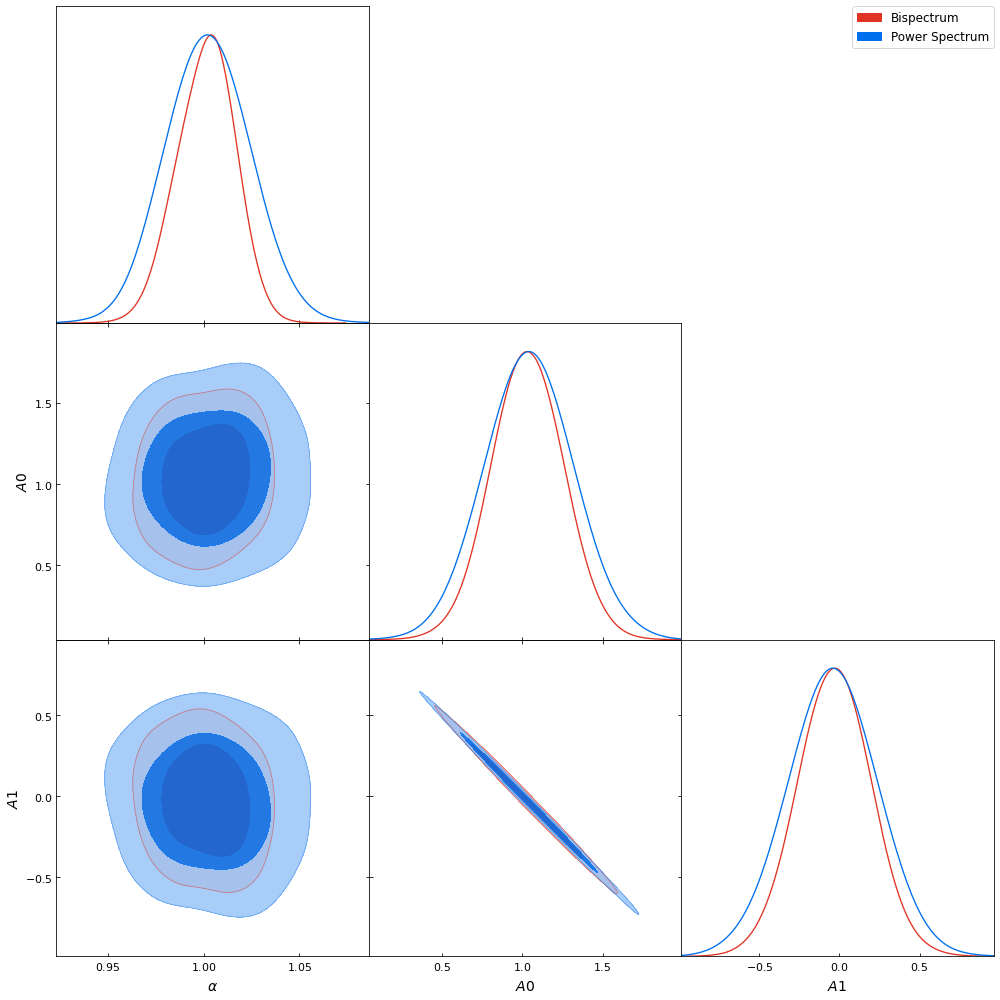

In [14]:
mcmc_bk = load('mcmcs/mcmc_is_bk_True_kmax_0.24.npz', 'Bispectrum')
mcmc_pk = load('mcmcs/mcmc_is_bk_False_kmax_0.24.npz')

# Triangle plot
g = plots.get_subplot_plotter(width_inch=14)
g.triangle_plot([mcmc_bk, mcmc_pk], filled=True)
plt.savefig('mcmc_poly_kmax_0.24.png', dpi=300, bbox_inches='tight')

In [20]:
d = np.load('mcmcs/mcmc_is_bk_False_kmax_0.10.npz')

In [23]:
d['chain'].shape

(5000, 20, 3)

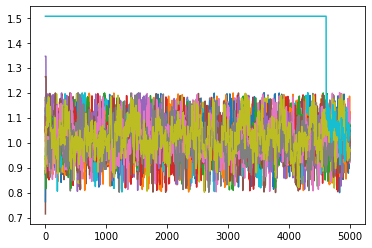

In [24]:
plt.plot(d['chain'][:, :, 0])

In [20]:
# read 
pk_mol = read_molino_pk()
pk_glm = read_glam_pk()
pk_glm_nobao = read_glam_pk_nobao()

bk_mol = read_molino_bk()
bk_glm = read_glam_bk()
bk_glm_nobao = read_glam_bk_nobao()

In [23]:
bk_glm['pk'].shape

(1097, 2600)

(0.9, 1.1)

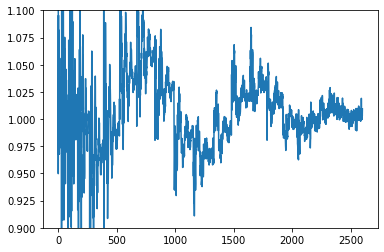

In [29]:
plt.plot(bk_glm['pk'].mean(axis=0)/bk_glm_nobao['pk'].mean(axis=0))
plt.ylim(0.9, 1.1)

In [5]:
from run_mcmc import BAO

In [11]:
bao_pk = BAO(bk_glm['k'], bk_glm['pk']/bk_glm_nobao['pk'].mean(axis=0), is_bk=True, fill_value=-1)
bao_pk.prep_k(0.0, 0.3)
bao_pk.prep_cov(pk_mol=bk_mol)

(1097, 2600)


In [12]:
bao_pk.is_good.mean()

1.0

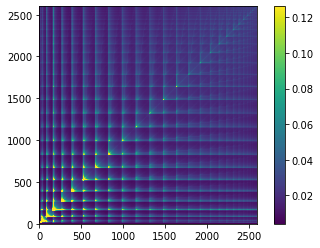

In [15]:
vmin, vmax = np.percentile(bao_pk.cov, [1, 99])
plt.imshow(bao_pk.cov, vmin=vmin, vmax=vmax, origin='lower')
plt.colorbar()

In [14]:
np.savetxt('./files/cov_bk.txt', bao_pk.cov)

(0.75, 1.25)

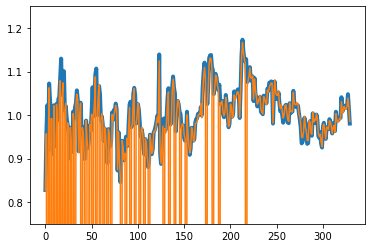

In [7]:
plt.plot(bao_pk.pk_rm[bao_pk.is_good], lw=4)
plt.plot(bao_pk.pk_rint(0.99*bao_pk.k[bao_pk.is_good]))
plt.ylim(0.75, 1.25)

In [8]:
ki = bao_pk.k[bao_pk.is_good]
kj = ki*0.99
bk_ = bao_pk.pk_rint(kj)
c = ['C1' for i in range(bk_.size)]
for j, bj in enumerate(bk_):
    if bj == -1:
        c[j] = 'C2'

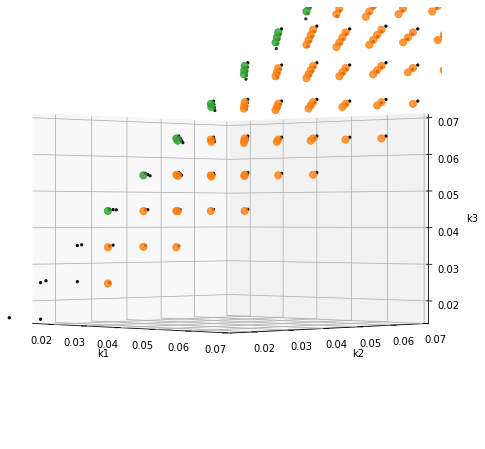

In [43]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')

ax.scatter3D(*bao_pk.k.T, color='k', marker='.', zorder=-10)
# ax.scatter3D(*ki.T, marker='o', s=50, color='C0')
ax.scatter3D(*kj.T, s=50, c=c, alpha=0.8, marker='o')


ax.set_zlim(0.015, 0.07)
ax.set_xlim(0.015, 0.07)
ax.set_ylim(0.015, 0.07)
# rotate the axes and update

ax.view_init(0, -45)
ax.set_xlabel('k1')
ax.set_ylabel('k2')
ax.set_zlabel('k3')
plt.draw()


Text(0, 0.5, 'k2')

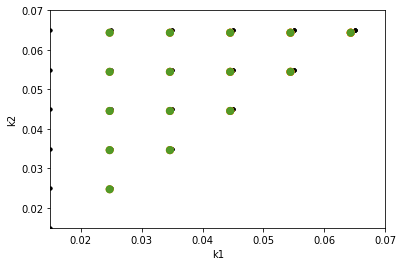

In [44]:
plt.scatter(bao_pk.k[:, 0], bao_pk.k[:, 1], color='k', marker='.', zorder=-10)
plt.scatter(kj[:, 0], kj[:, 1], s=50, c=c, alpha=0.8, marker='o')
plt.xlim(0.015, 0.07)
plt.ylim(0.015, 0.07)
plt.xlabel('k1')
plt.ylabel('k2')

Text(0, 0.5, 'k3')

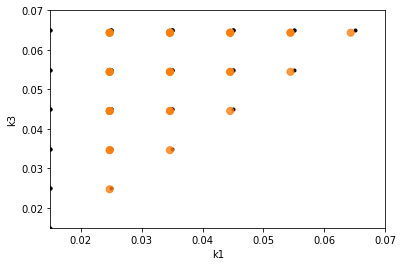

In [45]:
plt.scatter(bao_pk.k[:, 0], bao_pk.k[:, 2], color='k', marker='.', zorder=-10)
plt.scatter(kj[:, 0], kj[:, 2], s=50, c=c, alpha=0.8, marker='o')
plt.xlim(0.015, 0.07)
plt.ylim(0.015, 0.07)
plt.xlabel('k1')
plt.ylabel('k3')

Text(0, 0.5, 'k3')

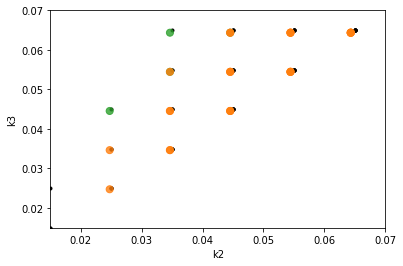

In [46]:
plt.scatter(bao_pk.k[:, 1], bao_pk.k[:, 2], color='k', marker='.', zorder=-10)
plt.scatter(kj[:, 1], kj[:, 2], s=50, c=c, alpha=0.8, marker='o')
plt.xlim(0.015, 0.07)
plt.ylim(0.015, 0.07)
plt.xlabel('k2')
plt.ylabel('k3')

In [52]:
np.column_stack([ki[:10], c[:10]])

array([['0.025', '0.025', '0.025', 'C1'],
       ['0.025', '0.025', '0.035', 'C1'],
       ['0.025', '0.025', '0.045', 'C2'],
       ['0.025', '0.035', '0.035', 'C1'],
       ['0.025', '0.035', '0.045', 'C1'],
       ['0.025', '0.035', '0.055', 'C2'],
       ['0.025', '0.045', '0.045', 'C1'],
       ['0.025', '0.045', '0.055', 'C1'],
       ['0.025', '0.045', '0.065', 'C2'],
       ['0.025', '0.055', '0.055', 'C1']], dtype='<U32')

In [49]:
kj[:10]

array([[0.02475, 0.02475, 0.02475],
       [0.02475, 0.02475, 0.03465],
       [0.02475, 0.02475, 0.04455],
       [0.02475, 0.03465, 0.03465],
       [0.02475, 0.03465, 0.04455],
       [0.02475, 0.03465, 0.05445],
       [0.02475, 0.04455, 0.04455],
       [0.02475, 0.04455, 0.05445],
       [0.02475, 0.04455, 0.06435],
       [0.02475, 0.05445, 0.05445]])

In [50]:
c[:10]

['C1', 'C1', 'C2', 'C1', 'C1', 'C2', 'C1', 'C1', 'C2', 'C1']

## 1D search

In [3]:
kmin = 0.0345
kmax = np.arange(0.05, 0.31, 0.05)

# power spectra
bao_pk = BAO(pk_glm['k'], pk_glm['pk']/pk_glm_nobao['pk'].mean(axis=0))
bao_pk_red = BAO(pk_glm['k'], pk_glm['pk']/pk_glm_nobao['pk'].mean(axis=0))
# bispectra
bao_bk = BAO(bk_glm['k'], bk_glm['pk']/bk_glm_nobao['pk'].mean(axis=0), is_bk=True)
bao_bk_red = BAO(bk_glm['k'], bk_glm['pk']/bk_glm_nobao['pk'].mean(axis=0), is_bk=True)



sigmas = []
sigmas3 = []
sigmas2 = []
sigmas4 = []

for kmax_ in kmax:
    sigmas.append(sigma_finder(bao_pk, kmin, kmax_))
    sigmas3.append(sigma_finder(bao_pk_red, kmin, kmax_, pk_mol=pk_mol))
    sigmas2.append(sigma_finder(bao_bk, kmin, kmax_))
    sigmas4.append(sigma_finder(bao_bk_red, kmin, kmax_, pk_mol=bk_mol))

    
sigmas = np.array(sigmas)
sigmas3 = np.array(sigmas3)
sigmas2 = np.array(sigmas2)
sigmas4 = np.array(sigmas4)

(1097, 30)
(1097, 30)
(1097, 2600)
(1097, 2600)


In [8]:
bao_bk_red = BAO(bk_glm['k'], bk_glm['pk']/bk_glm_nobao['pk'].mean(axis=0), is_bk=True)

(1097, 2600)


In [15]:
bao_bk_red.prep_k(0.0345, 0.25)
bao_bk_red.prep_cov(pk_mol=bk_mol)

In [16]:
x = np.linspace(0.8, 1.2)
y = []
for x_ in x:
    y.append(bao_bk_red(x_))

In [17]:
y

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.9008106046595806,
 0.1072954419362534,
 1.4608538353995097,
 3.645758118167116,
 6.404897215111109,
 9.737259449584531,
 13.240403370941543,
 16.612430972626775,
 20.282624727035582,
 23.764051342814092,
 27.580606957578745,
 31.23874017074631,
 34.93428308282339,
 38.57985103774817,
 42.02397719196573,
 44.82508929772856,
 47.837077433290986,
 50.51095136867315,
 52.75281291907097,
 54.480082436072024,
 nan,
 nan,
 nan,
 nan,
 nan]

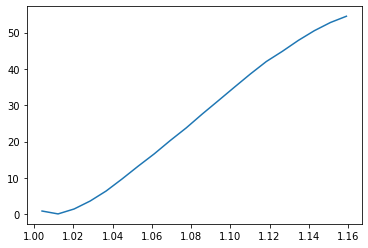

In [18]:
plt.plot(x, y)

In [5]:
%matplotlib inline

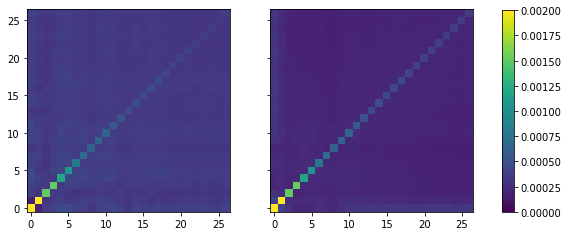

In [6]:
fg, ax = plt.subplots(ncols=2, figsize=(8, 4), sharey=True)

ax[0].imshow(bao_pk.cov, vmin=0., vmax=2.0e-3, origin='lower')
map_ = ax[1].imshow(bao_pk_red.cov, vmin=0., vmax=2.0e-3, origin='lower')

cax_ = fg.add_axes([0.95, 0.15, 0.02, 0.7])
fg.colorbar(map_, cax=cax_)

Text(0, 0.5, '$\\sigma (\\alpha)$')

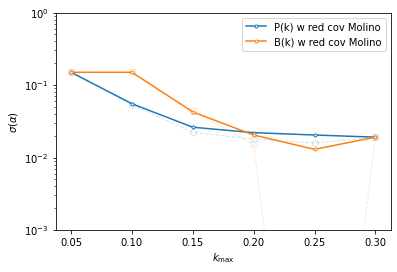

In [7]:
plt.semilogy(kmax, sigmas, 'C0o--', mfc='w', lw=1, alpha=0.2)
plt.semilogy(kmax, sigmas3, 'C0.-', mfc='w', label='P(k) w red cov Molino')

plt.semilogy(kmax, sigmas2, 'C1s--', mfc='w', lw=1, alpha=0.2)
plt.semilogy(kmax, sigmas4, 'C1.-', mfc='w', label='B(k) w red cov Molino')

plt.legend()
plt.ylim(1.0e-3, 1.0e0)
plt.xlabel(r'$k_{\rm max}$')
plt.ylabel(r'$\sigma (\alpha)$')